In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./titanic/titanic_train.csv')
predict_df = pd.read_csv('./titanic/test.csv')
gender_submission_df = pd.read_csv('./titanic/gender_submission.csv')

# 알파벳 뒤에 붙는 숫자 값은 무시하고 Alphabet만 가져오는 전략을 선택
train_df['Cabin'] = train_df['Cabin'].str[:1]


# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category_age(age):
    cat = ''
    if age <= -1: cat = 0
    elif age <= 5: cat = 1
    elif age <= 12: cat = 2
    elif age <= 18: cat = 3
    elif age <= 25: cat = 4
    elif age <= 35: cat = 5
    elif age <= 60: cat = 6
    else: cat = 7
               
    return cat

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = [0, 1, 2, 3, 4, 5, 6, 7]
 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
train_df['Age_range'] = train_df['Age'].apply(lambda x : get_category_age(x))

# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category_fare(fare):
    cat = ''
    if fare <= 0: cat = 0
    elif fare <= 10: cat = 1
    elif fare <= 20: cat = 2
    elif fare <= 30: cat = 3
    elif fare <= 40: cat = 4
    elif fare <= 50: cat = 5
    elif fare <= 60: cat = 6
    else: cat = 7
               
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
 
train_df['Fare_range'] = train_df['Fare'].apply(lambda x : get_category_fare(x))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,6,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,5,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,1


In [49]:
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)

    y = df['Survived']
    df = df.drop('Survived', axis=1, inplace=False)
    return df, y


def fillna(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df


def drop_features_update(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)
    return df

In [50]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

train_df = fillna(train_df)
X, y = drop_features(train_df)
X.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_range,Fare_range
0,3,male,1,0,N,S,4,1
1,1,female,1,0,C,C,6,7
2,3,female,0,0,N,S,5,1
3,1,female,1,0,C,S,5,6
4,3,male,0,0,N,S,5,1


In [4]:
print('Sex 분포\n',train_df['Sex'].value_counts())
print('Embarked 분포\n',train_df['Embarked'].value_counts())
print('Cabin 분포\n',train_df['Cabin'].value_counts())

Sex 분포
 Sex
male      577
female    314
Name: count, dtype: int64
Embarked 분포
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64
Cabin 분포
 Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [51]:
# 라벨 인코딩 구현
# Sex
def get_category_sex(sex):
    cat = ''
    if sex == "male": cat = 0
    else: cat = 1
    return cat

group_names = [0, 1]
X['Sex'] = X['Sex'].apply(lambda x : get_category_sex(x))

# Embarked
def get_category_embarked(embarked):
    cat = ''
    if embarked == "S": cat = 0
    elif embarked == "C": cat= 1
    elif embarked == "Q": cat= 2
    else: cat = 3
    return cat

group_names = [0, 1, 2, 3]
X['Embarked'] = X['Embarked'].apply(lambda x : get_category_embarked(x))

# Cabin
def get_category_cabin(cabin):
    cat = ''
    if cabin == "A": cat = 0
    elif cabin == "B": cat= 1
    elif cabin == "C": cat= 2
    elif cabin == "D": cat= 3
    elif cabin == "E": cat= 4
    elif cabin == "F": cat= 5
    elif cabin == "G": cat= 6
    elif cabin == "N": cat= 7
    else: cat = 8
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
X['Cabin'] = X['Cabin'].apply(lambda x : get_category_cabin(x))

In [52]:
from sklearn.preprocessing import StandardScaler

# 표준화 => 2차원 데이터
sc = StandardScaler()
X = sc.fit_transform(X)
X[1]

array([-1.56610693,  1.35557354,  0.43279337, -0.47367361, -1.91449093,
        0.97626307,  0.58683487,  1.98498764])

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    
    accuracy = accuracy_score(y_test , pred)
    
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# 의사결정나무는 입력 변수들의 상대적인 크기나 범위에 크게 영향을 받지 않는다.
# 이는 트리 기반 모델의 특성 
# 의사결정나무는 입력 변수들을 특정 임계값을 기준으로 분할하여 의사결정을 내리기 때문에
# 변수들의 스케일이 달라져도 그 기준이 되는 임계값이 함께 조정되어 모델의 성능에는 큰 영향을 미치지 않습니다.

# 훈련 데이터 정확도와 테스트 데이터 정확도 간 차이가 5~10% 정도면 적절한 수준의 일반화 성능을 보인다고 볼 수 있다.
print(f"train score: {dt.score(X_train, y_train)}")
print(f"test score: {dt.score(X_test, y_test)}")

train score: 0.9129213483146067
test score: 0.8268156424581006


In [56]:
from sklearn.tree import export_graphviz

class_names = ['Not Survived', 'Survived']
feature_names = train_df.columns.drop('Survived')

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt, out_file="tree.dot", class_names=class_names, \
feature_names = feature_names, impurity=True, filled=True)

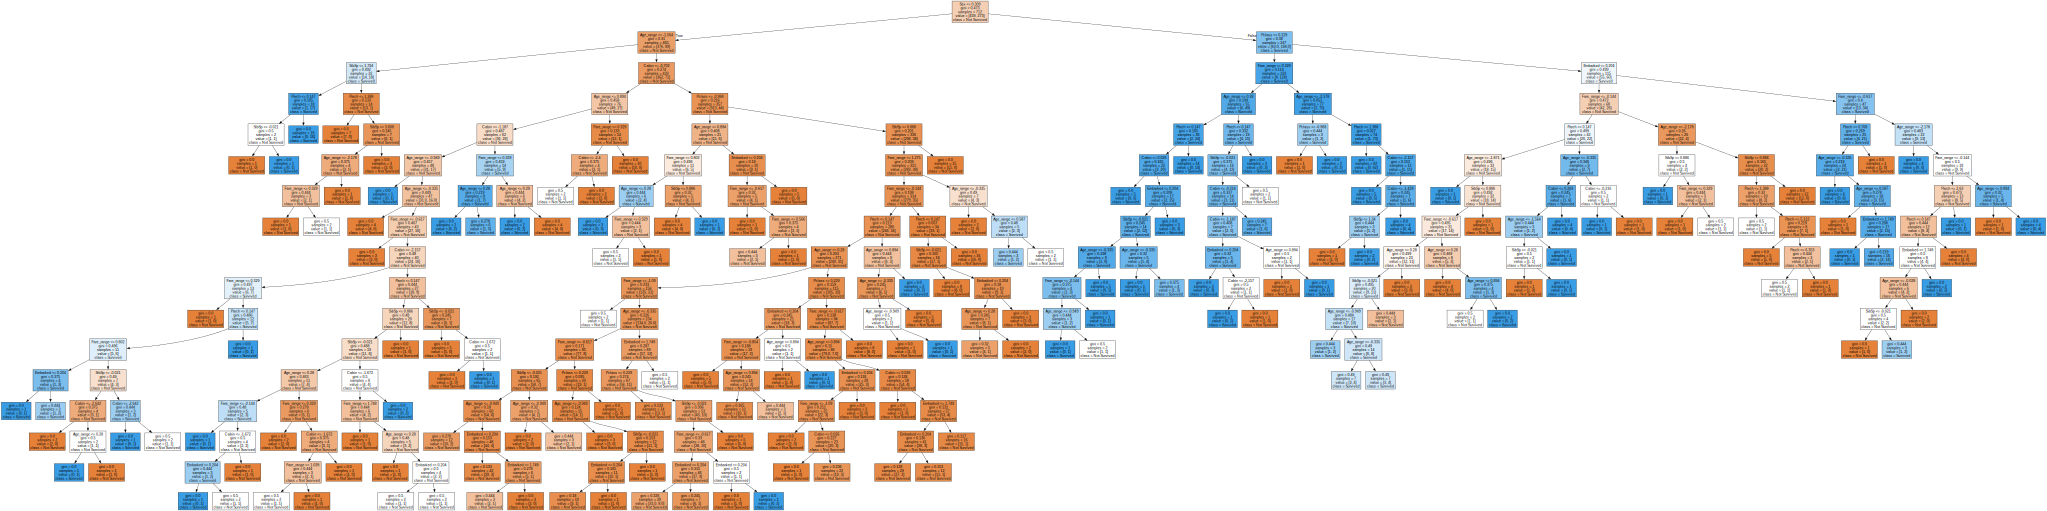

In [57]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [58]:
dt.feature_importances_

array([0.09804289, 0.39639784, 0.09140122, 0.03962548, 0.06906752,
       0.04768719, 0.18132292, 0.07645494])

Feature importances:
[0.098 0.396 0.091 0.04  0.069 0.048 0.181 0.076] 

Pclass: 0.098
Sex: 0.396
SibSp: 0.091
Parch: 0.040
Cabin: 0.069
Embarked: 0.048
Age_range: 0.181
Fare_range: 0.076


<Axes: ylabel='None'>

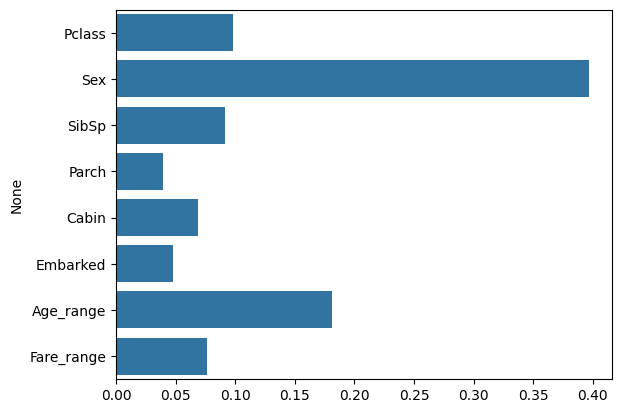

In [59]:
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt.feature_importances_, 3)), "\n")

# feature별 importance 매핑
for name, value in zip(feature_names , dt.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_ , y=feature_names)

In [60]:
y_pred = dt.predict(X_test) 
print(y_pred)
pred_proba = dt.predict_proba(X_test)[:, 1]
print(pred_proba[:4])

get_clf_eval(y_test , y_pred, pred_proba)

[0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[0.         0.06896552 0.         1.        ]
오차 행렬
[[101   9]
 [ 22  47]]
정확도: 0.8268, 정밀도: 0.8393, 재현율: 0.6812,    F1: 0.7520, AUC:0.7752


### 과대 적합
> - 트리의 최대 깊이(max_depth)를 낮추거나
> - 최소 샘플 수(min_samples_split, min_samples_leaf)를 늘리는 등 모델의 복잡도를 낮추는 방법
> - L1 또는 L2 정규화를 통해 모델 파라미터의 복잡도를 제한
> - 앙상블 기법(Random Forest, Gradient Boosting 등)을 사용하여 개별 모델의 과대적합을 완화
> - ...

#### 회기 모델일 경우 KFold 분할기
#### 분류 모델일 경우 타깃을 골고루 나누기 위해 StratifiedFKold

> - splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
> - cross_validate(dt, X_train, y_train, cv=splitter)


#### min_impurity_decrease
> - 의사결정나무 모델은 데이터를 분할하여 트리 구조를 만드는데, 이때 분할 기준으로 사용되는 것이 불순도(impurity) 감소량
> - 불순도 감소량이 클수록 더 좋은 분할 기준
> - 노드를 분할할 때 최소한의 불순도 감소량을 지정하는 것
> - 즉, 이 값 보다 불순도 감소량이 작으면 노드를 더 이상 분할하지 않는다.


#### min_sample_split
> - 노드를 분할하기 위한 최소 샘플 수를 지정하는 것
> - 즉, 이 값보다 적은 수의 샘플이 포함된 노드는 더 이상 분할되지 않는다.

In [64]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

# 탐색할 하이퍼 파라미터 범위 설정
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': range(2, 20, 1),
    'min_samples_leaf': range(1, 20, 1),
    'criterion': ['gini', 'entropy'],
    
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
# cv=5 -> 5-fold 교차 검증, 보통 5 또는 10-폴드 교차 검증을 많이 사용한다.

# 학습 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 14}


In [65]:
# 훈련 데이터 성능 평가
print("Train Accuracy:", grid_search.score(X_train, y_train))

# 테스트 데이터 성능 평가 
print("Test Accuracy:", grid_search.score(X_test, y_test))

Train Accuracy: 0.8567415730337079
Test Accuracy: 0.8268156424581006


In [66]:
best_dt

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=14)

In [67]:
y_pred = best_dt.predict(X_test) 
print(y_pred)

pred_proba = best_dt.predict_proba(X_test)[:, 1]
print(pred_proba[:4])

get_clf_eval(y_test , y_pred, pred_proba)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[0.12142857 0.12142857 0.         1.        ]
오차 행렬
[[102   8]
 [ 23  46]]
정확도: 0.8268, 정밀도: 0.8519, 재현율: 0.6667,    F1: 0.7480, AUC:0.8708


In [20]:
for max_depth, mean_test_score in zip(grid_search.cv_results_['param_max_depth'], grid_search.cv_results_['mean_test_score']):
    print(f"max_depth = {max_depth}")
    print(f"mean_test_score = {mean_test_score}", "\n\n")

max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_score = 0.8047670639219934 


max_depth = 3
mean_test_scor

In [61]:
predict_df['Age_range'] = predict_df['Age'].apply(lambda x : get_category_age(x))

predict_df['Fare_range'] = predict_df['Fare'].apply(lambda x : get_category_fare(x))

predict_df = fillna(predict_df)
predict_df = drop_features_update(predict_df)

predict_df['Sex'] = predict_df['Sex'].apply(lambda x : get_category_sex(x))
predict_df['Embarked'] = predict_df['Embarked'].apply(lambda x : get_category_embarked(x))

predict_df['Cabin'] = predict_df['Cabin'].str[:1]
predict_df['Cabin'] = predict_df['Cabin'].apply(lambda x : get_category_cabin(x))

predict_df.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_range,Fare_range
0,3,0,0,0,7,2,5,1
1,3,1,1,0,7,0,6,1
2,2,0,0,0,7,2,7,1
3,3,0,0,0,7,0,5,1
4,3,1,1,1,7,0,4,2


In [62]:
predict_df = sc.transform(predict_df)
predict_df[1]

array([ 0.82737724,  1.35557354,  0.43279337, -0.47367361,  0.51129323,
       -0.56876427,  0.58683487, -0.85389516])

In [68]:
predict_titanic_pred_dt = best_dt.predict(predict_df)
print(f"predict_titanic_knr 예측: {predict_titanic_pred_dt}")

gender_submission_df['Survived'] = predict_titanic_pred_dt
gender_submission_df.to_csv('titanic_submission_dt_hyper.csv',index=False)

gender_submission_df

predict_titanic_knr 예측: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### GridSearchCV 객체의 주요 속성:
> - grid_search.best_params_: 최적의 하이퍼파라미터 조합
> - grid_search.best_score_: 최적의 하이퍼파라미터 조합의 교차 검증 평균 점수
> - grid_search.cv_results_: 각 하이퍼파라미터 조합의 교차 검증 결과

#### grid_search.cv_results_에는 다음과 같은 정보가 담겨있다:
> - 'params': 각 하이퍼파라미터 조합
> - 'mean_test_score': 각 하이퍼파라미터 조합의 교차 검증 평균 점수
> - 'std_test_score': 각 하이퍼파라미터 조합의 교차 검증 점수 표준편차

#### max_depth가 5일 때 일반화된 점수를 보여주지만 9일 때는 과대적합된 점수를 보여준다.
> - GridSearchCV는 교차 검증을 통해 평균 테스트 점수가 가장 높은 하이퍼파라미터 값을 찾는다.
> - max_depth=9일 때 평균 테스트 점수가 0.732880181260829로 가장 높다.
> - 따라서 GridSearchCV는 max_depth=9를 최적의 하이퍼파라미터 값으로 선택.

#### 그러나 실제 테스트 데이터 점수를 보면 max_depth=5일 때가 0.7207792207792207로 더 높다.
> - GridSearchCV는 교차 검증 점수를 기준으로 최적의 하이퍼파라미터를 선택하지만, 실제 테스트 데이터 점수와는 차이가 있을 수 있다.
> - 과대적합을 막기 위해서는 모델의 복잡도를 적절히 조절하는 것이 중요한데, max_depth=9는 과도하게 복잡한 모델일 수 있다.
> - 따라서 실제 테스트 데이터 점수를 기준으로 볼 때, max_depth=5가 더 적절한 선택

> - 결론적으로, GridSearchCV가 찾은 최적의 하이퍼파라미터 값과 실제 테스트 데이터 점수를 기준으로 한 최적의 하이퍼파라미터 값이 다를 수 있다.
> - 이런 경우에는 최종적으로 테스트 데이터 점수를 기준으로 판단하는 것이 중요

#### 의사결정나무 모델은 데이터를 분할하여 트리 구조를 만드는데, 이때 분할 기준으로 사용되는 것이 불순도(impurity) 감소량
> - 불순도 감소량이 클수록 더 좋은 분할 기준
> - min_impurity_decrease와 같은 임계값 관련 하이퍼파라미터가 중요한 역할
> - 이 파라미터를 통해 과적합을 방지하고 트리의 복잡도를 적절히 조절
> - 따라서 의사결정나무 모델에서는 임계값 설정이 중요한 요소

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(pred, "\n")

pred_proba = dt.predict_proba(X_test)[:, 1] # 분류 결정 예측 확률

get_clf_eval(y_test , pred, pred_proba)

precision_recall_curve_plot(y_test, pred_proba)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

> - DecisionTreeClassifier는 내부적으로 임계값을 사용하지만 이 값을 직접 조절할 수 있는 매개변수는 없다.
> - 대신 정보이득 등의 기준을 사용하여 최적의 분할 지점을 자동으로 찾는다.
> - 하지만 실제 문제에서는 상황에 따라 정밀도와 재현율의 균형을 다르게 맞춰야 할 수 있다. 이를 위해서는 임계값을 직접 조절할 수 있어야 한다.
> - precision_recall_curve 함수를 사용하면 다양한 임계값에 대한 정밀도와 재현율을 확인할 수 있어, 문제에 맞는 최적의 임계값을 선택할 수 있다.
> - DecisionTreeClassifier 자체에는 임계값 매개변수가 없지만, 외부 함수를 사용하여 임계값 조절 및 분석이 가능

> - F1 점수 0.8 이상 : 매우 좋은 성능
> - F1 점수 0.7 ~ 0.8 : 좋은 성능, 의료 쪽에선 0.8 이상이 바람직
> - F1 점수 0.6 ~ 0.7 : 보통 성능
> - F1 점수 0.5 ~ 0.6 : 낮은 성능
> - F1 점수 0.5 미만 : 매우 낮은 성능

In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    binarizer = Binarizer(threshold=threshold).fit(pred_proba_c1) 
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)
    print("\n")

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]

pred_proba = dt.predict_proba(X_test)

for threshold in thresholds:
    y_pred = (pred_proba[:, 1] > threshold).astype(int)
    get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), threshold)

In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=9)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(pred, "\n")

pred_proba = dt.predict_proba(X_test)[:, 1] # 분류 결정 예측 확률

get_clf_eval(y_test , pred, pred_proba)

In [ ]:
thresholds = [0.15, 0.25, 0.35]
# 임계값은 모델이 예측한 클래스 1(True)에 대한 확률이 얼마 이상일 때 해당 샘플을 클래스 1로 분류할 것인지를 결정하는 기준값

pred_proba = dt.predict_proba(X_test)
# 첫 번째 열은 클래스 0의 확률, 두 번째 열은 클래스 1의 확률
# print(pred_proba)

for threshold in thresholds:
    y_pred = (pred_proba[:, 1] > threshold).astype(int)
    get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), threshold)


print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

print(dt.n_features_in_)
print(dt.predict([[0, 75.250000,	80.000000,	32.000000,	1.250000,	36.600000,	0.626250,	41.000000]]))